In [25]:
from aigyminsper.search.SearchAlgorithms import BuscaLargura
from aigyminsper.search.SearchAlgorithms import BuscaProfundidade
from aigyminsper.search.SearchAlgorithms import BuscaProfundidadeIterativa
from aigyminsper.search.Graph import State
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
class SumOne(State):

    def __init__(self, n, op, g):
        self.operator = op
        self.number = n
        self.goal = g

    def sucessors(self):
        sucessors = []
        if self.number < self.goal:
            sucessors.append(SumOne(self.number+1, "+1 ", self.goal))
            sucessors.append(SumOne(self.number+2, "+2 ", self.goal))
        return sucessors

    def is_goal(self):
        if self.goal == self.number:
            return True
        return False

    def description(self):
        return "Este é um agente simples que sabe somar 1 e 2"

    def cost(self):
        return 1

    def env(self):
        return self.number

In [30]:
def main(objetivo, algoritmo):
    state = SumOne(1, '', objetivo)
    if algoritmo == "busca largura":
        algorithm = BuscaLargura()
    elif algoritmo == "busca profundidade":
        algorithm = BuscaProfundidade()
    elif algoritmo == "busca profundidade iterativa":
        algorithm = BuscaProfundidadeIterativa()
    else:
        print("Algoritmo não encontrado")
        return None
    start_time = datetime.now()
    result = algorithm.search(state)
    end_time = datetime.now()
    tempo_processamento = end_time - start_time
    print(f'Tempo de processamento = {end_time - start_time}')
    if result != None:
        print('Achou a solução!')
        print(result.show_path())
    else:
        print('Nao achou solução')

    return tempo_processamento

df = pd.DataFrame(columns=['Objetivo','Algoritmo', 'Tempo de Processamento'])
algoritmos = ["busca largura", "busca profundidade", "busca profundidade iterativa"]

for i in range(len(algoritmos)):
    for j in range(1,41):
        tempo = main(j, algoritmos[i])
        df.loc[len(df)] = [j, algoritmos[i], tempo]

Tempo de processamento = 0:00:00.000029
Achou a solução!

Tempo de processamento = 0:00:00.000017
Achou a solução!
 ; +1 
Tempo de processamento = 0:00:00.000011
Achou a solução!
 ; +2 
Tempo de processamento = 0:00:00.000015
Achou a solução!
 ; +1  ; +2 
Tempo de processamento = 0:00:00.000019
Achou a solução!
 ; +2  ; +2 
Tempo de processamento = 0:00:00.000025
Achou a solução!
 ; +1  ; +2  ; +2 
Tempo de processamento = 0:00:00.000033
Achou a solução!
 ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000050
Achou a solução!
 ; +1  ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000076
Achou a solução!
 ; +2  ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000191
Achou a solução!
 ; +1  ; +2  ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000152
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000232
Achou a solução!
 ; +1  ; +2  ; +2  ; +2  ; +2  ; +2 
Tempo de processamento = 0:00:00.000315
Achou a solução!
 ; +2  ; +2  ; +2  ; +2  ; +2  

TypeError: search() missing 1 required positional argument: 'm'

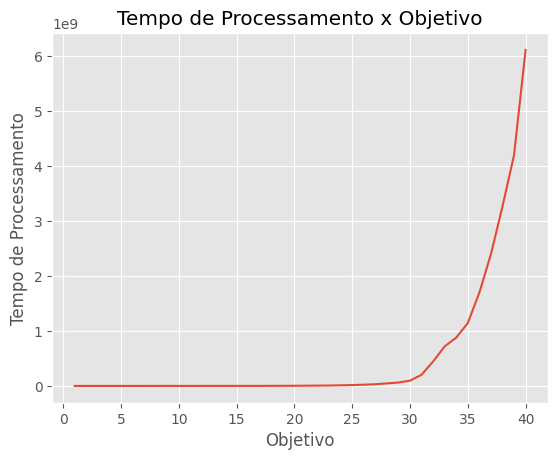

In [ ]:
plt.plot(df['Objetivo'], df['Tempo de Processamento'])
plt.xlabel ( 'Objetivo' )
plt.ylabel ( 'Tempo de Processamento' )
plt.title ( 'Tempo de Processamento x Objetivo' )
plt.style.use ( 'ggplot' )
plt.show ()